In [ ]:
!pip install scikit-multilearn-ng

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MultiLabelBinarizer,LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv("/content/data.csv", delimiter='\t')

data.info()
data.to_csv("parsed.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [ ]:
data.isnull().sum()
data.isna().sum()

Q1A               0
Q1I               0
Q1E               0
Q2A               0
Q2I               0
              ...  
race              0
voted             0
married           0
familysize        0
major         11425
Length: 172, dtype: int64

In [ ]:
data["country"].unique()


array(['IN', 'US', 'PL', 'MY', 'MX', 'GB', 'DE', 'EE', 'CA', 'EC', 'AU',
       'FI', 'ID', 'AE', 'NONE', 'ES', 'NI', 'DO', 'TR', 'NO', 'GR', 'LK',
       'BR', 'AR', 'KH', 'IT', 'MK', 'PT', 'BA', 'RU', 'HU', 'KR', 'IE',
       'RS', 'CZ', 'PH', 'RO', 'FR', 'SG', 'AT', 'UA', 'KW', 'CO', 'GE',
       'SE', 'HK', 'NZ', 'ZA', 'NL', 'DK', 'JM', 'LB', 'CL', 'AW', 'IL',
       'GT', 'PE', 'PK', 'NP', 'HR', 'CR', 'VE', 'BG', 'GH', 'MA', 'PR',
       'SI', 'LV', 'AL', 'VN', 'GU', 'BD', 'TH', 'NG', 'FO', 'UY', 'EG',
       'BE', 'SA', 'SV', 'CH', 'PY', 'SK', 'SY', 'TN', 'TT', 'SR', 'KE',
       'BY', 'PA', 'CY', 'BW', 'MZ', 'BB', 'GG', 'CW', 'IS', 'IR', 'BN',
       'MV', 'OM', 'DZ', 'JP', 'MU', nan, 'IQ', 'BO', 'MD', 'CN', 'LT',
       'BZ', 'BH', 'ME', 'QA', 'TW', 'PS', 'JO', 'SD', 'KY', 'AZ', 'AO',
       'BS', 'GY', 'MO', 'TZ', 'IM', 'AF', 'AM', 'UZ', 'LU', 'ET', 'JE',
       'VU', 'TJ', 'KZ', 'XK', 'HN', 'ZW', 'LA', 'MT', 'SN', 'MN', 'TG',
       'SC', 'RE', 'VC'], dtype=object)

In [ ]:
import re

def majorconvert(title):
    title = str(title).lower()

    # Define the dictionary of keywords and corresponding values
    major_map = {
        'business/management': ['busin', 'manage', 'buss', 'entrepreneur', 'managment', 'mba', 'md'],
        'I.T': ['information technology', 'it', 'computer', 'programming', 'coding', 'ibm', 'developer', 'hacking', 'ict'],
        'mathematics': ['math', 'logistics', 'st', 'marh', 'mate'],
        'biology': ['bio', 'plant', 'micro'],
        'english': ['tesl', 'english', 'esl'],
        'accountancy': ['account', 'accoun', 'acc', 'count'],
        'CA': ['ca'],
        'no degree': ['none', '0', '_', '.', 'nine', '19', 'undec', 'idk', 'hahaha', 'never', 'good', 'lol', 'na', 'secondary education', 'drop out', 'na', 'didnt attend'],
        'nursing': ['nurs', 'bsn'],
        'teaching': ['teach', 'lect'],
        'pharmacy/medical': ['pharma', 'medic', 'hospi', 'medicine', 'farmacy', 'pharacology'],
        'doctor': ['doctor', 'mbbs', 'surge', 'dermat'],
        'media': ['film', 'cinema', 'advert', 'act', 'digital', 'video', 'theat', 'radio', 'drama'],
        'international relations': ['international'],
        'human resources': ['human', 'hr'],
        'arts': ['art', 'painting', 'drawing', 'creative'],
        'islamic studies': ['islam', 'quran', 'halal', 'usul', 'zakat'],
        'physiotherapy': ['physio', 'fis'],
        'sociology': ['socio', 'social', 'sosio'],
        'banking': ['bank'],
        'agriculture': ['agri'],
        'marketing/finance': ['market', 'finance', 'marketing', 'retail', 'cmp'],
        'counselling': ['counsel', 'cauns'],
        'engineering': ['civil', 'mechanical', 'electrical', 'mechatronics', 'cs', 'chemical', 'tech'],
        'architecture': ['architecture', 'building'],
        'designer': ['design'],
        'pure sciences': ['science', 'sci'],
        'physics': ['physics', 'emc', 'physic'],
        'chemistry': ['chemistry', 'cis', 'chem'],
        'french': ['french'],
        'religious studies': ['religi', 'relegion', 'rel'],
        'actuarial studies': ['actua'],
        'dentist': ['dental', 'odont'],
        'fashion': ['beaut', 'fashion', 'make', 'cosmet'],
        'healthcare': ['health', 'wellness', 'healthcare'],
        'languages': ['language', 'lang'],
        'cookings': ['cook', 'bakery', 'culinary', 'food', 'chef'],
        'hotel management': ['hotel', 'food service', 'cater'],
        'therapeutical studies': ['therapy', 'ot'],
        'veterinary': ['veter', 'vet'],
        'surveyor studies': ['survey', 'qs', 'surveyors'],
        'aircrafts': ['aircraft', 'aviation', 'aero', 'navigation'],
        'environment': ['environment']
    }

    for major, keywords in major_map.items():
        if any(re.search(r'\b' + keyword + r'\b', title) for keyword in keywords):
            return major

    return 'no degree'  # Default return value if no match is found




In [ ]:

encoder = LabelEncoder()

In [ ]:

data['major'] = data['major'].apply(majorconvert)


In [ ]:
question_columns = [f"Q{i}A" for i in range(1, 43)]

data[question_columns] = data[question_columns].applymap(lambda x: x - 1 if x>=1 and x<= 4 else x)

print(data[question_columns].head())

<ipython-input-37-5f613921ceaa>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data[question_columns] = data[question_columns].applymap(lambda x: x - 1 if x>=1 and x<= 4 else x)


   Q1A  Q2A  Q3A  Q4A  Q5A  Q6A  Q7A  Q8A  Q9A  Q10A  ...  Q33A  Q34A  Q35A  \
0    3    3    1    3    3    3    3    3    1     0  ...     1     2     3   
1    3    0    1    2    3    3    2    3    2     1  ...     2     1     1   
2    2    0    3    0    3    2    0    2    1     3  ...     0     3     2   
3    1    2    1    0    2    2    3    1    2     2  ...     1     3     0   
4    1    1    2    3    3    1    3    3    3     2  ...     3     3     2   

   Q36A  Q37A  Q38A  Q39A  Q40A  Q41A  Q42A  
0     3     0     1     3     2     3     3  
1     2     3     1     1     0     1     1  
2     3     3     3     1     1     0     3  
3     0     1     0     2     3     3     1  
4     3     2     2     2     3     3     2  

[5 rows x 42 columns]


In [ ]:
data=data[question_columns].join(data.iloc[:,126:])
data=data.drop(columns= ["Q1A", "Q6A", "Q8A", "Q11A", "Q12A", "Q14A", "Q18A",
                    "Q22A", "Q27A", "Q29A", "Q32A", "Q33A", "Q35A", "Q39A"])

In [ ]:
data.head()

Q2A  Q3A  Q4A  Q5A  Q7A  Q9A  Q10A  Q13A  Q15A  Q16A  ...  screensize  \
0    3    1    3    3    3    1     0     3     3     3  ...           1   
1    0    1    2    3    2    2     1     3     2     2  ...           2   
2    0    3    0    3    0    1     3     3     3     3  ...           2   
3    2    1    0    2    3    2     2     0     1     1  ...           2   
4    1    2    3    3    3    3     2     3     3     2  ...           2   

   uniquenetworklocation  hand  religion  orientation  race  voted  married  \
0                      1     1        12            1    10      2        1   
1                      1     2         7            0    70      2        1   
2                      1     1         4            3    60      1        1   
3                      1     2         4            5    70      2        1   
4                      2     3        10            1    10      2        1   

   familysize      major  
0           2  no degree  
1           4  no degree  
2           3  no degree  
3           5  no degree  
4           4  no degree  

[5 rows x 74 columns]

In [ ]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Q2A                    39775 non-null  int64 
 1   Q3A                    39775 non-null  int64 
 2   Q4A                    39775 non-null  int64 
 3   Q5A                    39775 non-null  int64 
 4   Q7A                    39775 non-null  int64 
 5   Q9A                    39775 non-null  int64 
 6   Q10A                   39775 non-null  int64 
 7   Q13A                   39775 non-null  int64 
 8   Q15A                   39775 non-null  int64 
 9   Q16A                   39775 non-null  int64 
 10  Q17A                   39775 non-null  int64 
 11  Q19A                   39775 non-null  int64 
 12  Q20A                   39775 non-null  int64 
 13  Q21A                   39775 non-null  int64 
 14  Q23A                   39775 non-null  int64 
 15  Q24A               

Q2A           0
Q3A           0
Q4A           0
Q5A           0
Q7A           0
             ..
race          0
voted         0
married       0
familysize    0
major         0
Length: 74, dtype: int64

In [ ]:
data.isna().sum()

Q2A           0
Q3A           0
Q4A           0
Q5A           0
Q7A           0
             ..
race          0
voted         0
married       0
familysize    0
major         0
Length: 74, dtype: int64

In [ ]:
data["age"].min(),data["age"].max()

(13, 1998)

In [ ]:
data = data[data['age'] <= 100]

In [ ]:
data["age"].min(),data["age"].max()

(13, 99)

In [ ]:

anxiety_questions = ["Q2A", "Q4A", "Q7A", "Q9A", "Q15A",
                     "Q19A", "Q20A", "Q23A", "Q25A", "Q28A",
                     "Q30A", "Q36A", "Q40A", "Q41A"]

depression_questions = ["Q3A", "Q5A", "Q10A", "Q13A", "Q16A",
                        "Q17A", "Q21A", "Q24A", "Q26A", "Q31A",
                        "Q34A", "Q37A", "Q38A", "Q42A"]


dass_ranges = {
    'depression': 14,
    'anxiety': 10
}


data['Depression_Score'] = data[depression_questions].sum(axis=1)
data['Anxiety_Score'] = data[anxiety_questions].sum(axis=1)
data['Depression'] = data['Depression_Score'] >= dass_ranges['depression']
data['Anxiety'] = data['Anxiety_Score'] >= dass_ranges['anxiety']


data['Depression'] = data['Depression'].astype(int)
data['Anxiety'] = data['Anxiety'].astype(int)



data[['Depression_Score','Anxiety_Score','Depression', 'Anxiety']].head()

<ipython-input-45-fc76605264a4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Depression_Score'] = data[depression_questions].sum(axis=1)
<ipython-input-45-fc76605264a4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Anxiety_Score'] = data[anxiety_questions].sum(axis=1)
<ipython-input-45-fc76605264a4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Depression_Score  Anxiety_Score  Depression  Anxiety
0                27             34           1        1
1                24             17           1        1
2                39             12           1        1
3                16             17           1        1
4                32             40           1        1

Anxiety Distribution by Major:
major
CA                             1
I.T                          958
accountancy                   85
aircrafts                     11
architecture                 262
arts                         210
banking                        1
biology                       16
business/management           14
chemistry                    150
cookings                      99
dentist                        3
designer                      51
doctor                        25
engineering                   54
english                     1194
environment                    3
fashion                       19
french                         4
healthcare                    23
hotel management               4
human resources               10
international relations        1
islamic studies                4
languages                     44
marketing/finance            315
mathematics                   62
media                         51
no degree                  22870
nursin

<ipython-input-282-2e42003e458e>:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['country'] = data['country'].map(country_labels)


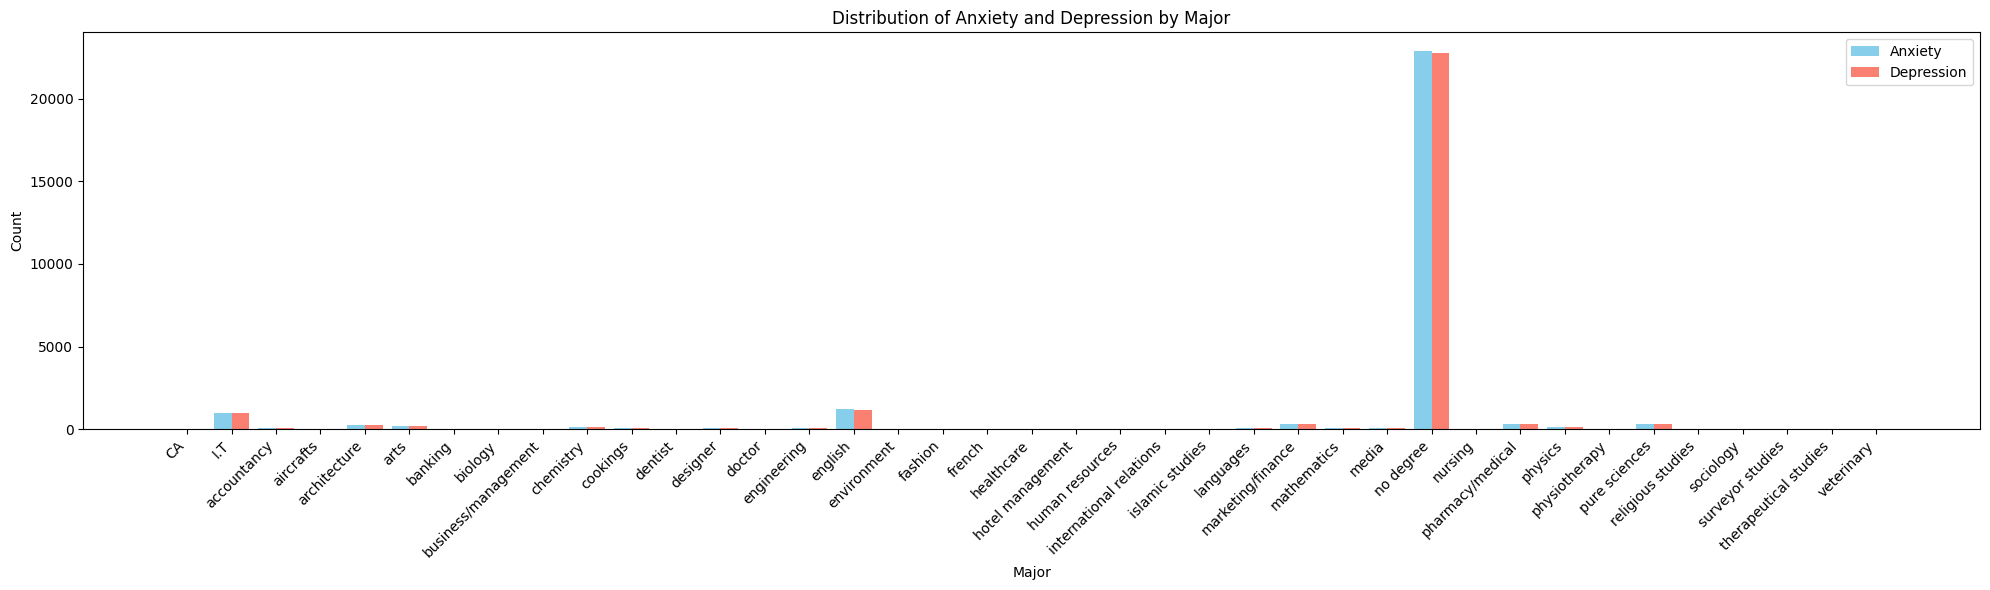

In [ ]:
country_labels = {
    "US": "United States",
    "CA": "Canada",
    "IN": "India",
    "GB": "United Kingdom",
    "AU": "Australia",
    "DE": "Germany",
    "FR": "France",
    "IT": "Italy",
    "ES": "Spain",
    "BR": "Brazil",
    "MX": "Mexico",
    "CN": "China",
    "JP": "Japan",
    "RU": "Russia",
    "ZA": "South Africa",
    "KR": "South Korea",
    "SE": "Sweden",
    "NL": "Netherlands",
    "CH": "Switzerland",
    "AR": "Argentina",
    "EG": "Egypt",
    "NG": "Nigeria",
    "PH": "Philippines",
    "SG": "Singapore",
    "ID": "Indonesia",
    "PK": "Pakistan",
    "KE": "Kenya",
    "TH": "Thailand",
    "MY": "Malaysia",
    "VN": "Vietnam",
    "PL": "Poland",
    "DK": "Denmark",
    "NO": "Norway",
    "FI": "Finland",
    "NZ": "New Zealand",
    "UA": "Ukraine",
    "IQ": "Iraq",
    "KW": "Kuwait",
    "QA": "Qatar",
    "SA": "Saudi Arabia",
    "AE": "United Arab Emirates",
    "TR": "Turkey",
    "IL": "Israel",
    "EE": "Estonia",
    "EC": "Ecuador",
    "NONE": "No Country Specified",
    "NI": "Nicaragua",
    "DO": "Dominican Republic",
    "GR": "Greece",
    "LK": "Sri Lanka",
    "KH": "Cambodia",
    "MK": "North Macedonia",
    "PT": "Portugal",
    "BA": "Bosnia and Herzegovina",
    "HU": "Hungary",
    "IE": "Ireland",
    "RS": "Serbia",
    "CZ": "Czech Republic",
    "RO": "Romania",
    "SG": "Singapore",
    "AT": "Austria",
    "CO": "Colombia",
    "GE": "Georgia",
    "HK": "Hong Kong",
    "JM": "Jamaica",
    "LB": "Lebanon",
    "CL": "Chile",
    "AW": "Aruba",
    "GT": "Guatemala",
    "PE": "Peru",
    "NP": "Nepal",
    "HR": "Croatia",
    "CR": "Costa Rica",
    "VE": "Venezuela",
    "BG": "Bulgaria",
    "GH": "Ghana",
    "MA": "Morocco",
    "PR": "Puerto Rico",
    "SI": "Slovenia",
    "LV": "Latvia",
    "AL": "Albania",
    "GU": "Guam",
    "BD": "Bangladesh",
    "FO": "Faroe Islands",
    "UY": "Uruguay",
    "BE": "Belgium",
    "SV": "El Salvador",
    "PY": "Paraguay",
    "SK": "Slovakia",
    "SY": "Syria",
    "TN": "Tunisia",
    "TT": "Trinidad and Tobago",
    "SR": "Suriname",
    "BY": "Belarus",
    "PA": "Panama",
    "CY": "Cyprus",
    "BW": "Botswana",
    "MZ": "Mozambique",
    "BB": "Barbados",
    "GG": "Guernsey",
    "CW": "Curacao",
    "IS": "Iceland",
    "IR": "Iran",
    "BN": "Brunei",
    "MV": "Maldives",
    "OM": "Oman",
    "DZ": "Algeria",
    "MU": "Mauritius",
    "BO": "Bolivia",
    "MD": "Moldova",
    "LT": "Lithuania",
    "BZ": "Belize",
    "BH": "Bahrain",
    "ME": "Montenegro",
    "TW": "Taiwan",
    "PS": "Palestine",
    "JO": "Jordan",
    "SD": "Sudan",
    "KY": "Cayman Islands",
    "AZ": "Azerbaijan",
    "AO": "Angola",
    "BS": "Bahamas",
    "GY": "Guyana",
    "MO": "Macao",
    "TZ": "Tanzania",
    "IM": "Isle of Man",
    "AF": "Afghanistan",
    "AM": "Armenia",
    "UZ": "Uzbekistan",
    "LU": "Luxembourg",
    "ET": "Ethiopia",
    "JE": "Jersey",
    "VU": "Vanuatu",
    "TJ": "Tajikistan",
    "KZ": "Kazakhstan",
    "XK": "Kosovo",
    "HN": "Honduras",
    "ZW": "Zimbabwe",
    "LA": "Laos",
    "MT": "Malta",
    "SN": "Senegal",
    "MN": "Mongolia",
    "TG": "Togo",
    "SC": "Seychelles",
    "RE": "Reunion",
    "VC": "Saint Vincent and the Grenadines",
}

data['country'] = data['country'].map(country_labels)

major_anxiety = data.groupby('major')['Anxiety'].sum()
major_depression = data.groupby('major')['Depression'].sum()



print("Anxiety Distribution by Major:")
print(major_anxiety)

print("\nDepression Distribution by Major:")
print(major_depression)


plt.figure(figsize=(20, 6))
bar_width = 0.4
major_indices = range(len(major_anxiety))
plt.bar(major_indices, major_anxiety.values, width=bar_width, color="skyblue", label="Anxiety")
plt.bar([i + bar_width for i in major_indices], major_depression.values, width=bar_width, color="salmon", label="Depression")


plt.title('Distribution of Anxiety and Depression by Major')
plt.xlabel('Major')
plt.ylabel('Count')
plt.xticks([i + bar_width / 2 for i in major_indices], major_anxiety.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()



In [ ]:

country_anxiety = data.groupby('country')['Anxiety'].sum()
country_depression = data.groupby('country')['Depression'].sum()



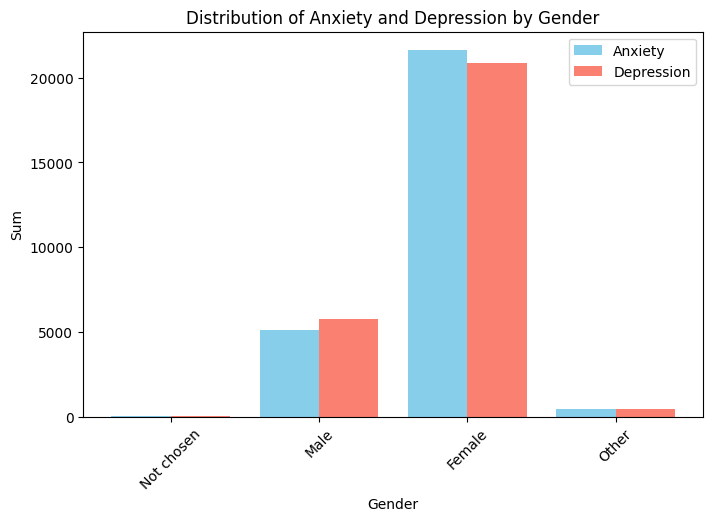

In [ ]:
gender_anxiety = data.groupby('gender')['Anxiety'].sum()
gender_depression = data.groupby('gender')['Depression'].sum()

plt.figure(figsize=(8, 5))
gender_indices = range(len(gender_anxiety))
plt.bar(gender_indices, gender_anxiety.values, width=bar_width, color="skyblue", label="Anxiety")
plt.bar([i + bar_width for i in gender_indices], gender_depression.values, width=bar_width, color="salmon", label="Depression")
plt.title('Distribution of Anxiety and Depression by Gender')
plt.xlabel('Gender')
plt.ylabel('Sum')
plt.xticks([i + bar_width / 2 for i in gender_indices], ["Not chosen", "Male", "Female", "Other"], rotation=45)
plt.legend()
plt.show()

In [ ]:

orientation_labels = {
    1: "Heterosexual",
    2: "Bisexual",
    3: "Homosexual",
    4: "Asexual",
    5: "Other"
}


education_labels = {
    1: "Less than high school",
    2: "High school",
    3: "University degree",
    4: "Graduate degree"
}


urban_labels = {
    1: "Rural (countryside)",
    2: "Suburban",
    3: "Urban (town, city)"
}


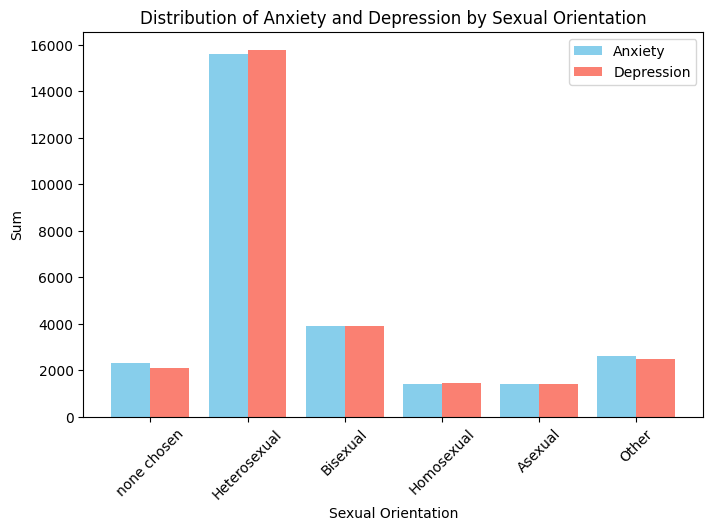

In [ ]:

# Grouping data by 'orientation'
orientation_anxiety = data.groupby('orientation')['Anxiety'].sum()
orientation_depression = data.groupby('orientation')['Depression'].sum()


plt.figure(figsize=(8, 5))
bar_width = 0.4
orientation_indices = range(len(orientation_anxiety))


plt.bar(orientation_indices, orientation_anxiety.values, width=bar_width, color="skyblue", label="Anxiety")
plt.bar([i + bar_width for i in orientation_indices], orientation_depression.values, width=bar_width, color="salmon", label="Depression")

plt.title('Distribution of Anxiety and Depression by Sexual Orientation')
plt.xlabel('Sexual Orientation')
plt.ylabel('Sum')
plt.xticks([i + bar_width / 2 for i in orientation_indices], [
    "none chosen", "Heterosexual", "Bisexual", "Homosexual", "Asexual", "Other"
], rotation=45)
plt.legend()
plt.show()


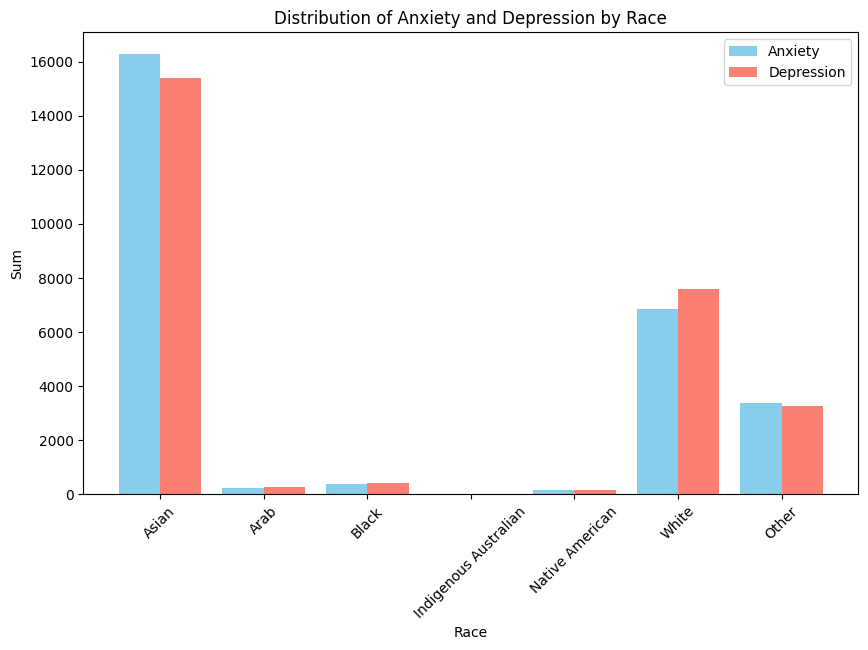

In [ ]:
race_anxiety = data.groupby('race')['Anxiety'].sum()
race_depression = data.groupby('race')['Depression'].sum()

plt.figure(figsize=(10, 6))
race_indices = range(len(race_anxiety))
plt.bar(race_indices, race_anxiety.values, width=bar_width, color="skyblue", label="Anxiety")
plt.bar([i + bar_width for i in race_indices], race_depression.values, width=bar_width, color="salmon", label="Depression")
plt.title('Distribution of Anxiety and Depression by Race')
plt.xlabel('Race')
plt.ylabel('Sum')
plt.xticks([i + bar_width / 2 for i in race_indices], [
    "Asian", "Arab", "Black", "Indigenous Australian", "Native American", "White", "Other"
], rotation=45)
plt.legend()
plt.show()

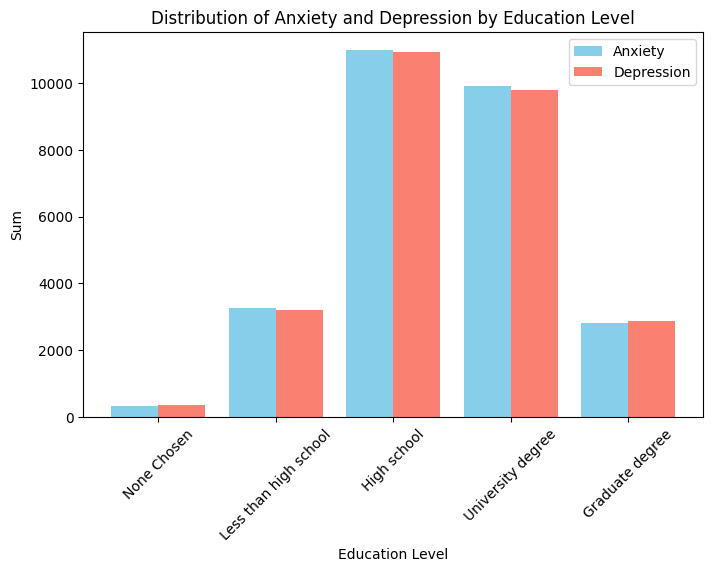

In [ ]:

education_anxiety = data.groupby('education')['Anxiety'].sum()
education_depression = data.groupby('education')['Depression'].sum()


plt.figure(figsize=(8, 5))
education_indices = range(len(education_anxiety))
plt.bar(education_indices, education_anxiety.values, width=bar_width, color="skyblue", label="Anxiety")
plt.bar([i + bar_width for i in education_indices], education_depression.values, width=bar_width, color="salmon", label="Depression")
plt.title('Distribution of Anxiety and Depression by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Sum')
plt.xticks([i + bar_width / 2 for i in education_indices], [
    "None Chosen", "Less than high school", "High school", "University degree", "Graduate degree"
], rotation=45)
plt.legend()
plt.show()


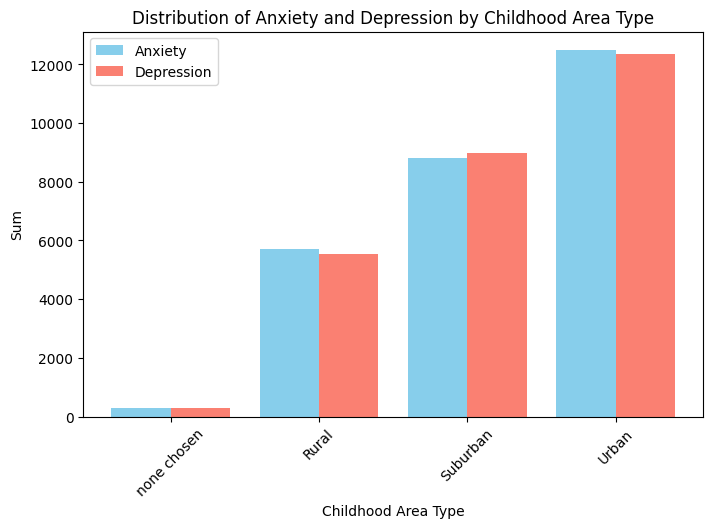

In [ ]:
urban_anxiety = data.groupby('urban')['Anxiety'].sum()
urban_depression = data.groupby('urban')['Depression'].sum()

plt.figure(figsize=(8, 5))
bar_width = 0.4
urban_indices = range(len(urban_anxiety))
plt.bar(urban_indices, urban_anxiety.values, width=bar_width, color="skyblue", label="Anxiety")
plt.bar([i + bar_width for i in urban_indices], urban_depression.values, width=bar_width, color="salmon", label="Depression")
plt.title('Distribution of Anxiety and Depression by Childhood Area Type')
plt.xlabel('Childhood Area Type')
plt.ylabel('Sum')
plt.xticks([i + bar_width / 2 for i in urban_indices], ["none chosen", "Rural", "Suburban", "Urban"], rotation=45)
plt.legend()
plt.show()

In [ ]:
# Mapping for Sexual Orientation
orientation_labels = {
    1: "Heterosexual",
    2: "Bisexual",
    3: "Homosexual",
    4: "Asexual",
    5: "Other"
}


# Mapping for Education Level
education_labels = {
    1: "Less than high school",
    2: "High school",
    3: "University degree",
    4: "Graduate degree"
}

# Mapping for Childhood Area Type
urban_labels = {
    1: "Rural (countryside)",
    2: "Suburban",
    3: "Urban (town, city)"
}


<ipython-input-51-b456c7fbc74a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=orientation, palette="coolwarm", order=orientation.value_counts().index)


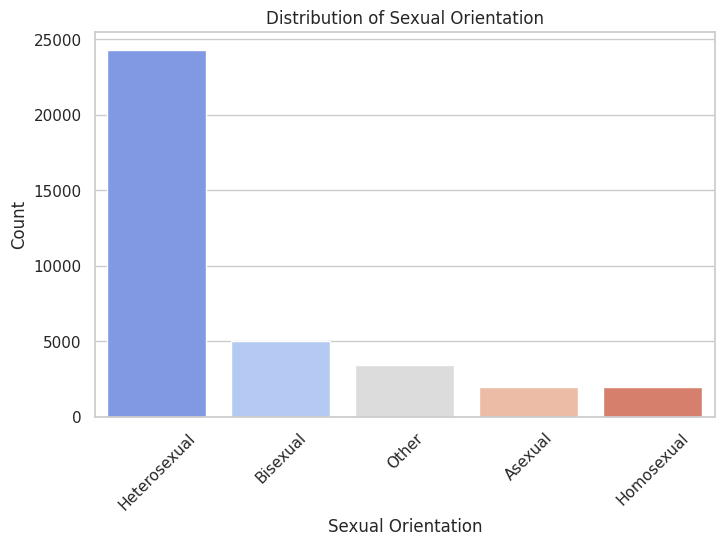

In [ ]:

orientation = data['orientation'].map(orientation_labels)


sns.set(style="whitegrid")

# Plot for Sexual Orientation
plt.figure(figsize=(8, 5))
sns.countplot(x=orientation, palette="coolwarm", order=orientation.value_counts().index)
plt.title("Distribution of Sexual Orientation")
plt.xlabel("Sexual Orientation")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-52-d974170493b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=education, palette="Set2", order=education.value_counts().index)


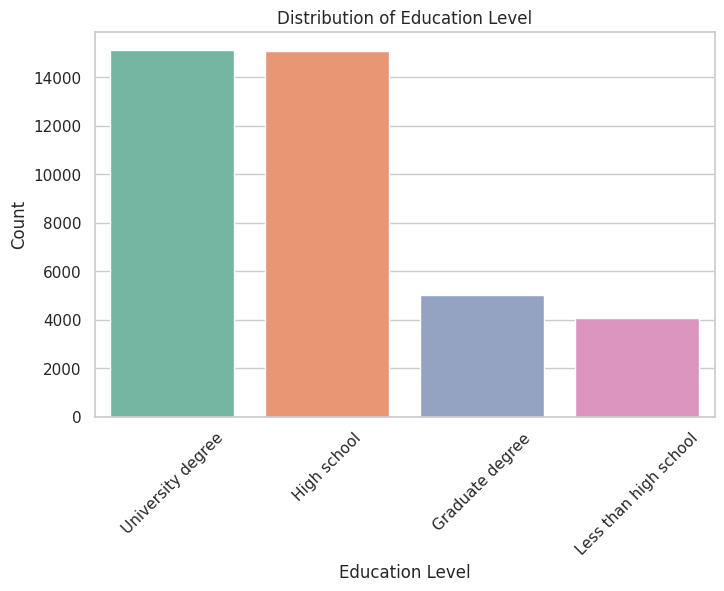

In [ ]:
education = data['education'].map(education_labels)

# Plot for Education Level
plt.figure(figsize=(8, 5))
sns.countplot(x=education, palette="Set2", order=education.value_counts().index)
plt.title("Distribution of Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-53-9f384d9ada55>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=urban, palette="pastel", order=urban.value_counts().index)


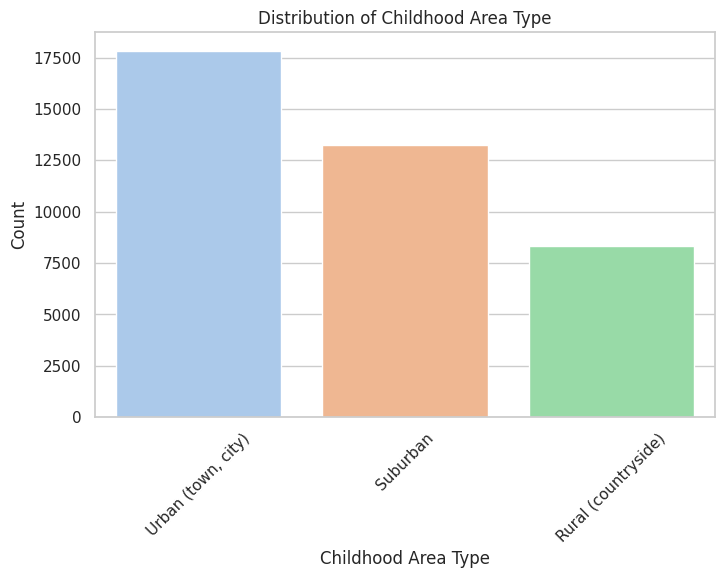

In [ ]:
urban = data['urban'].map(urban_labels)
# Plot for Childhood Area Type
plt.figure(figsize=(8, 5))
sns.countplot(x=urban, palette="pastel", order=urban.value_counts().index)
plt.title("Distribution of Childhood Area Type")
plt.xlabel("Childhood Area Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()




In [ ]:

data['major'] = encoder.fit_transform(data['major'])
data["major"].unique()

array([ 2, 29,  1,  6,  5, 26, 32, 16, 15, 31, 27, 34,  9,  3,  8, 28, 14,
       10, 13, 23, 18, 20, 30,  4, 22, 17, 11, 25, 19, 38, 12, 21, 33, 37,
       36,  0, 24, 35,  7, 39])

In [ ]:


country_codes = ['IN', 'US', 'PL', 'MY', 'MX', 'GB', 'DE', 'EE', 'CA', 'EC', 'AU',
                 'FI', 'ID', 'AE', 'NONE', 'ES', 'NI', 'DO', 'TR', 'NO', 'GR', 'LK',
                 'BR', 'AR', 'KH', 'IT', 'MK', 'PT', 'BA', 'RU', 'HU', 'KR', 'IE',
                 'RS', 'CZ', 'PH', 'RO', 'FR', 'SG', 'AT', 'UA', 'KW', 'CO', 'GE',
                 'SE', 'HK', 'NZ', 'ZA', 'NL', 'DK', 'JM', 'LB', 'CL', 'AW', 'IL',
                 'GT', 'PE', 'PK', 'NP', 'HR', 'CR', 'VE', 'BG', 'GH', 'MA', 'PR',
                 'SI', 'LV', 'AL', 'VN', 'GU', 'BD', 'TH', 'NG', 'FO', 'UY', 'EG',
                 'BE', 'SA', 'SV', 'CH', 'PY', 'SK', 'SY', 'TN', 'TT', 'SR', 'KE',
                 'BY', 'PA', 'CY', 'BW', 'MZ', 'BB', 'GG', 'CW', 'IS', 'IR', 'BN',
                 'MV', 'OM', 'DZ', 'JP', 'MU', 'IQ', 'BO', 'MD', 'CN', 'LT',
                 'BZ', 'BH', 'ME', 'QA', 'TW', 'PS', 'JO', 'SD', 'KY', 'AZ', 'AO',
                 'BS', 'GY', 'MO', 'TZ', 'IM', 'AF', 'AM', 'UZ', 'LU', 'ET', 'JE',
                 'VU', 'TJ', 'KZ', 'XK', 'HN', 'ZW', 'LA', 'MT', 'SN', 'MN', 'TG',
                 'SC', 'RE', 'VC']




data['country'].fillna('None', inplace=True)


data['country'] = encoder.fit_transform(data['country'])

<ipython-input-42-952caf11250f>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna('None', inplace=True)


In [ ]:
plt.figure(figsize=(42,42))
q_corr=data.corr(method='spearman')
sns.heatmap(q_corr,annot=True,fmt=".2f")
plt.show()


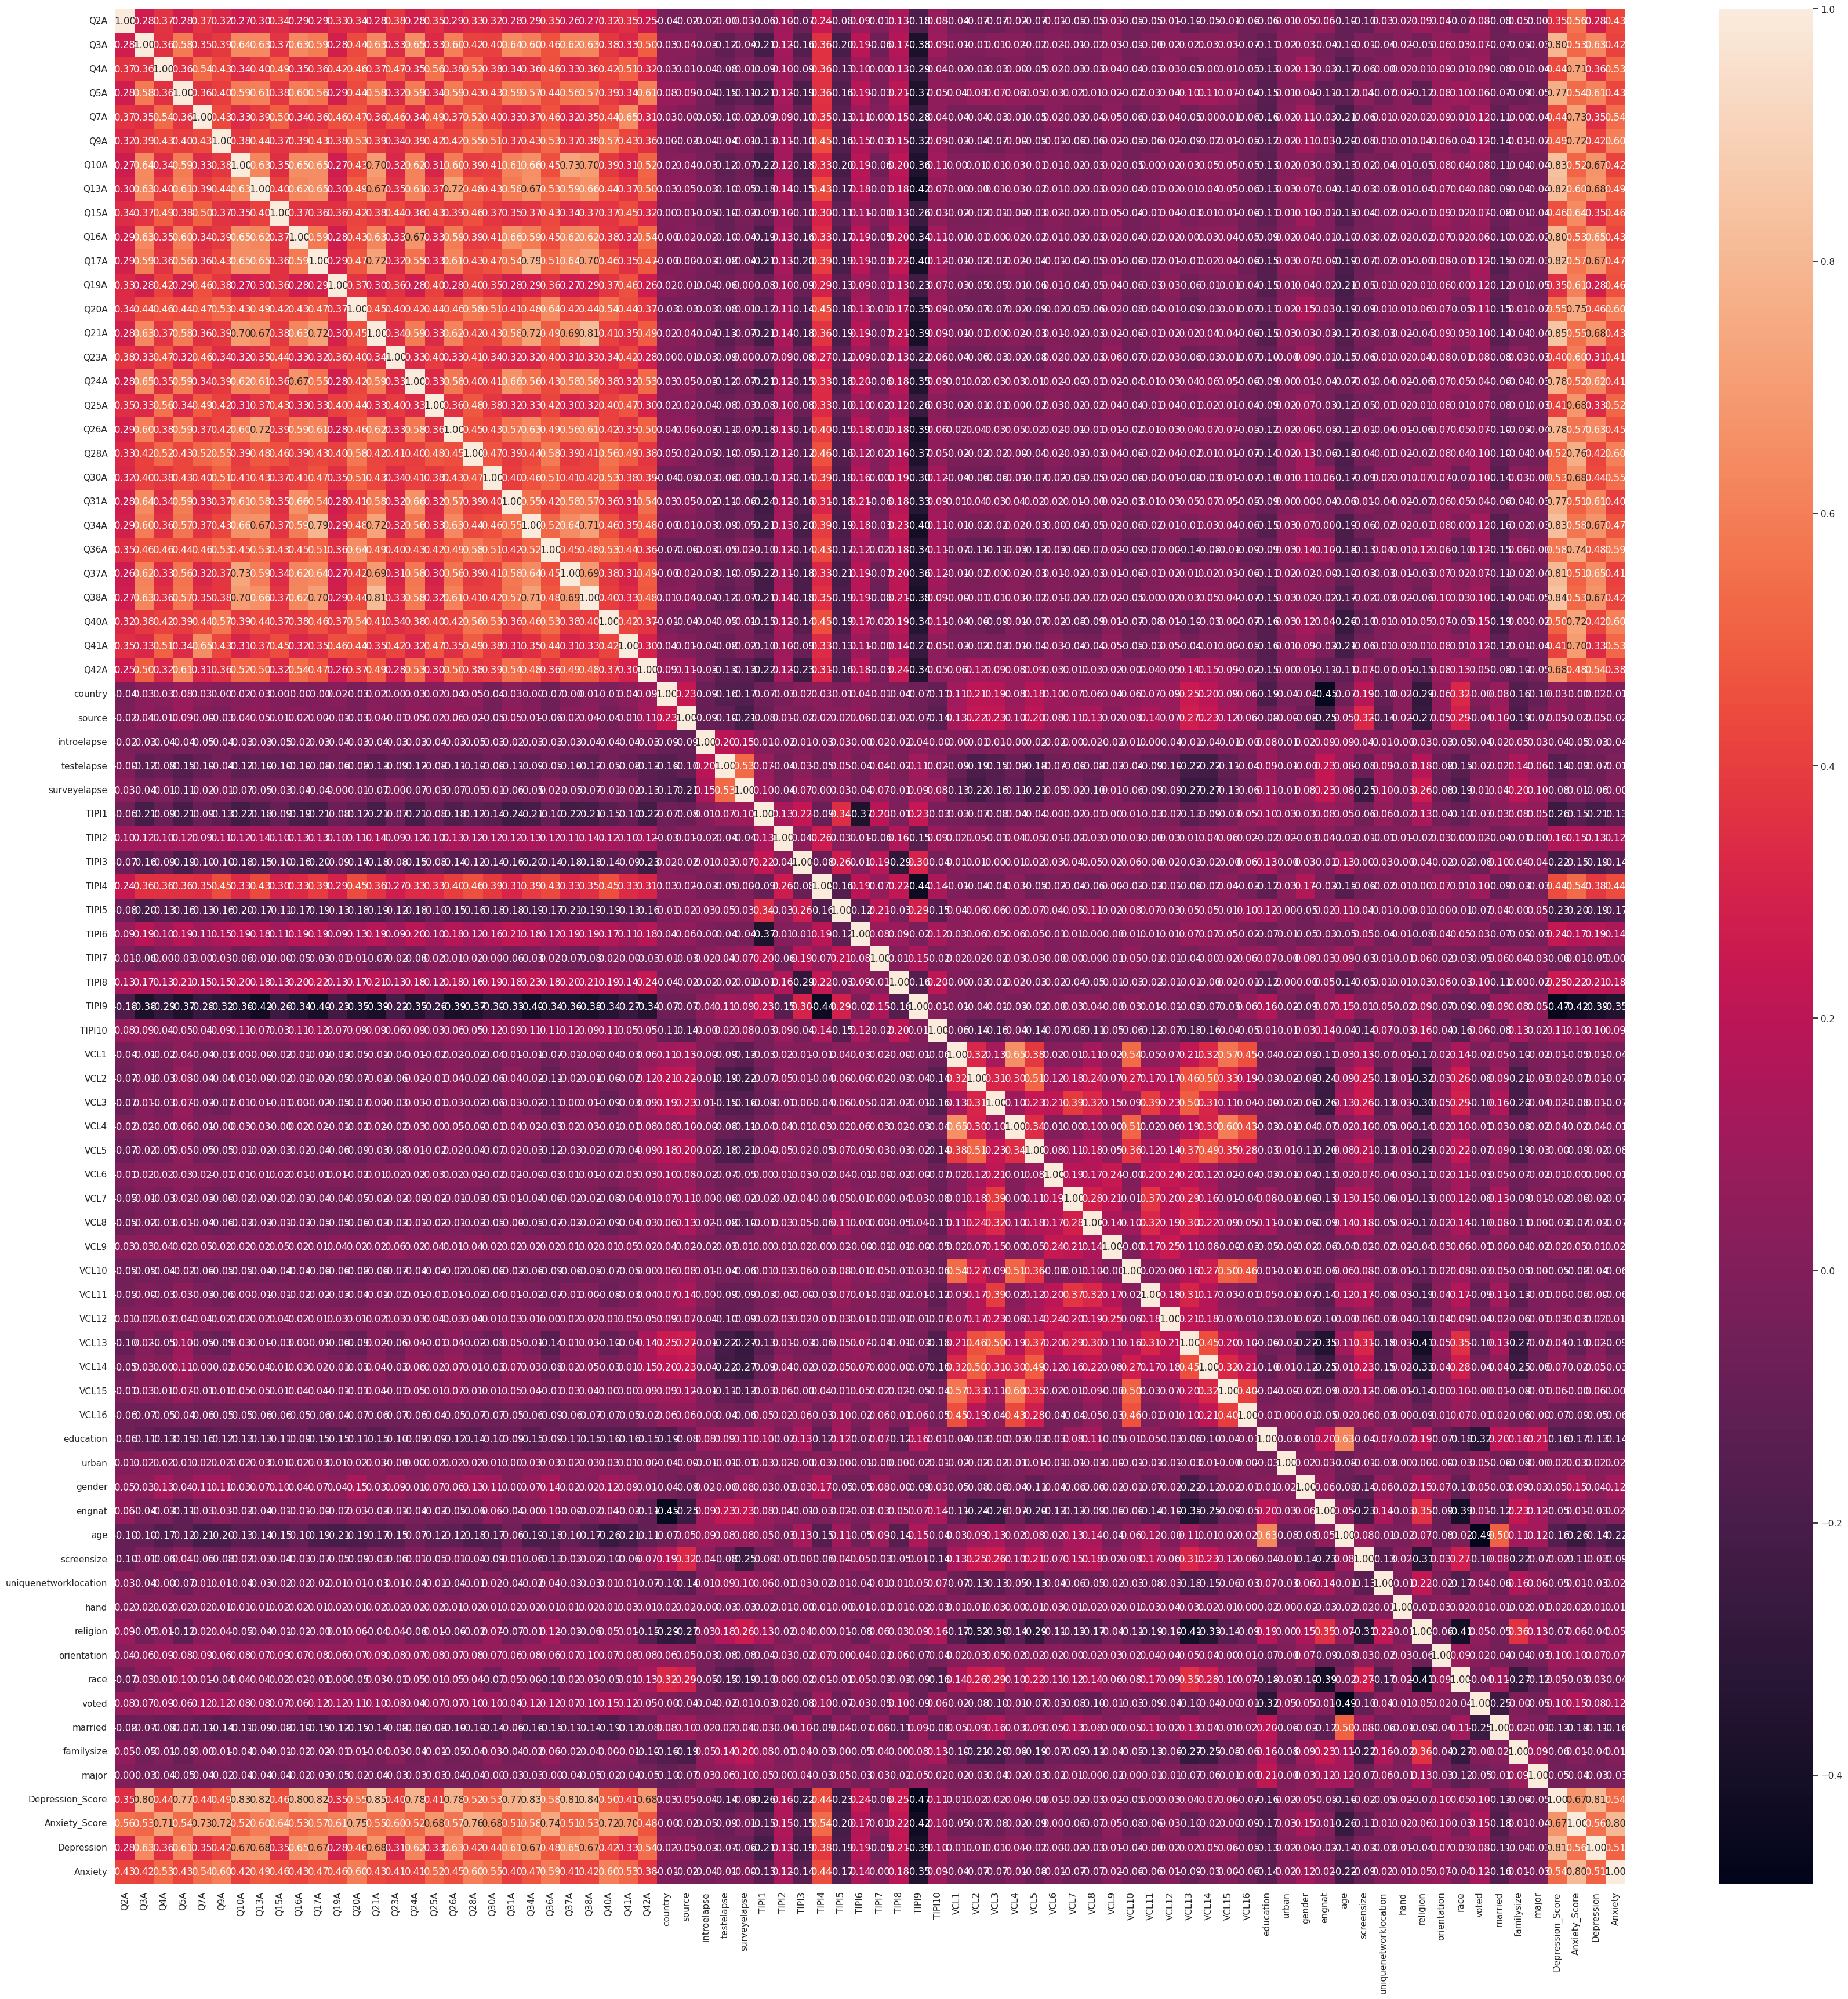

In [ ]:
sca=StandardScaler()
datas=sca.fit_transform(data)
datas=pd.DataFrame(datas,columns=data.columns)
plt.figure(figsize=(42,42))
q_corr=datas.corr(method='spearman')
sns.heatmap(q_corr,annot=True,fmt=".2f")
plt.show()



In [ ]:
q_corr[['Depression_Score','Anxiety_Score','Depression','Anxiety']].drop(index=['Depression','Anxiety','Depression_Score','Anxiety_Score'])

Depression_Score  Anxiety_Score  Depression   Anxiety
Q2A                 0.348688       0.559506    0.279877  0.429931
Q3A                 0.795438       0.528027    0.630984  0.416520
Q4A                 0.442177       0.709863    0.355067  0.530441
Q5A                 0.766660       0.538542    0.611423  0.425429
Q7A                 0.437356       0.727069    0.349775  0.541773
...                      ...            ...         ...       ...
race                0.051695      -0.033352    0.031927 -0.038679
voted               0.097494       0.153475    0.083314  0.123145
married            -0.129973      -0.176789   -0.114866 -0.157808
familysize         -0.055992       0.007827   -0.044964  0.010024
major              -0.047357      -0.036655   -0.034281 -0.025964

[74 rows x 4 columns]

In [ ]:
datared=data.iloc[:,:28].join(data[["Anxiety_Score","Depression_Score","Anxiety","Depression"]])


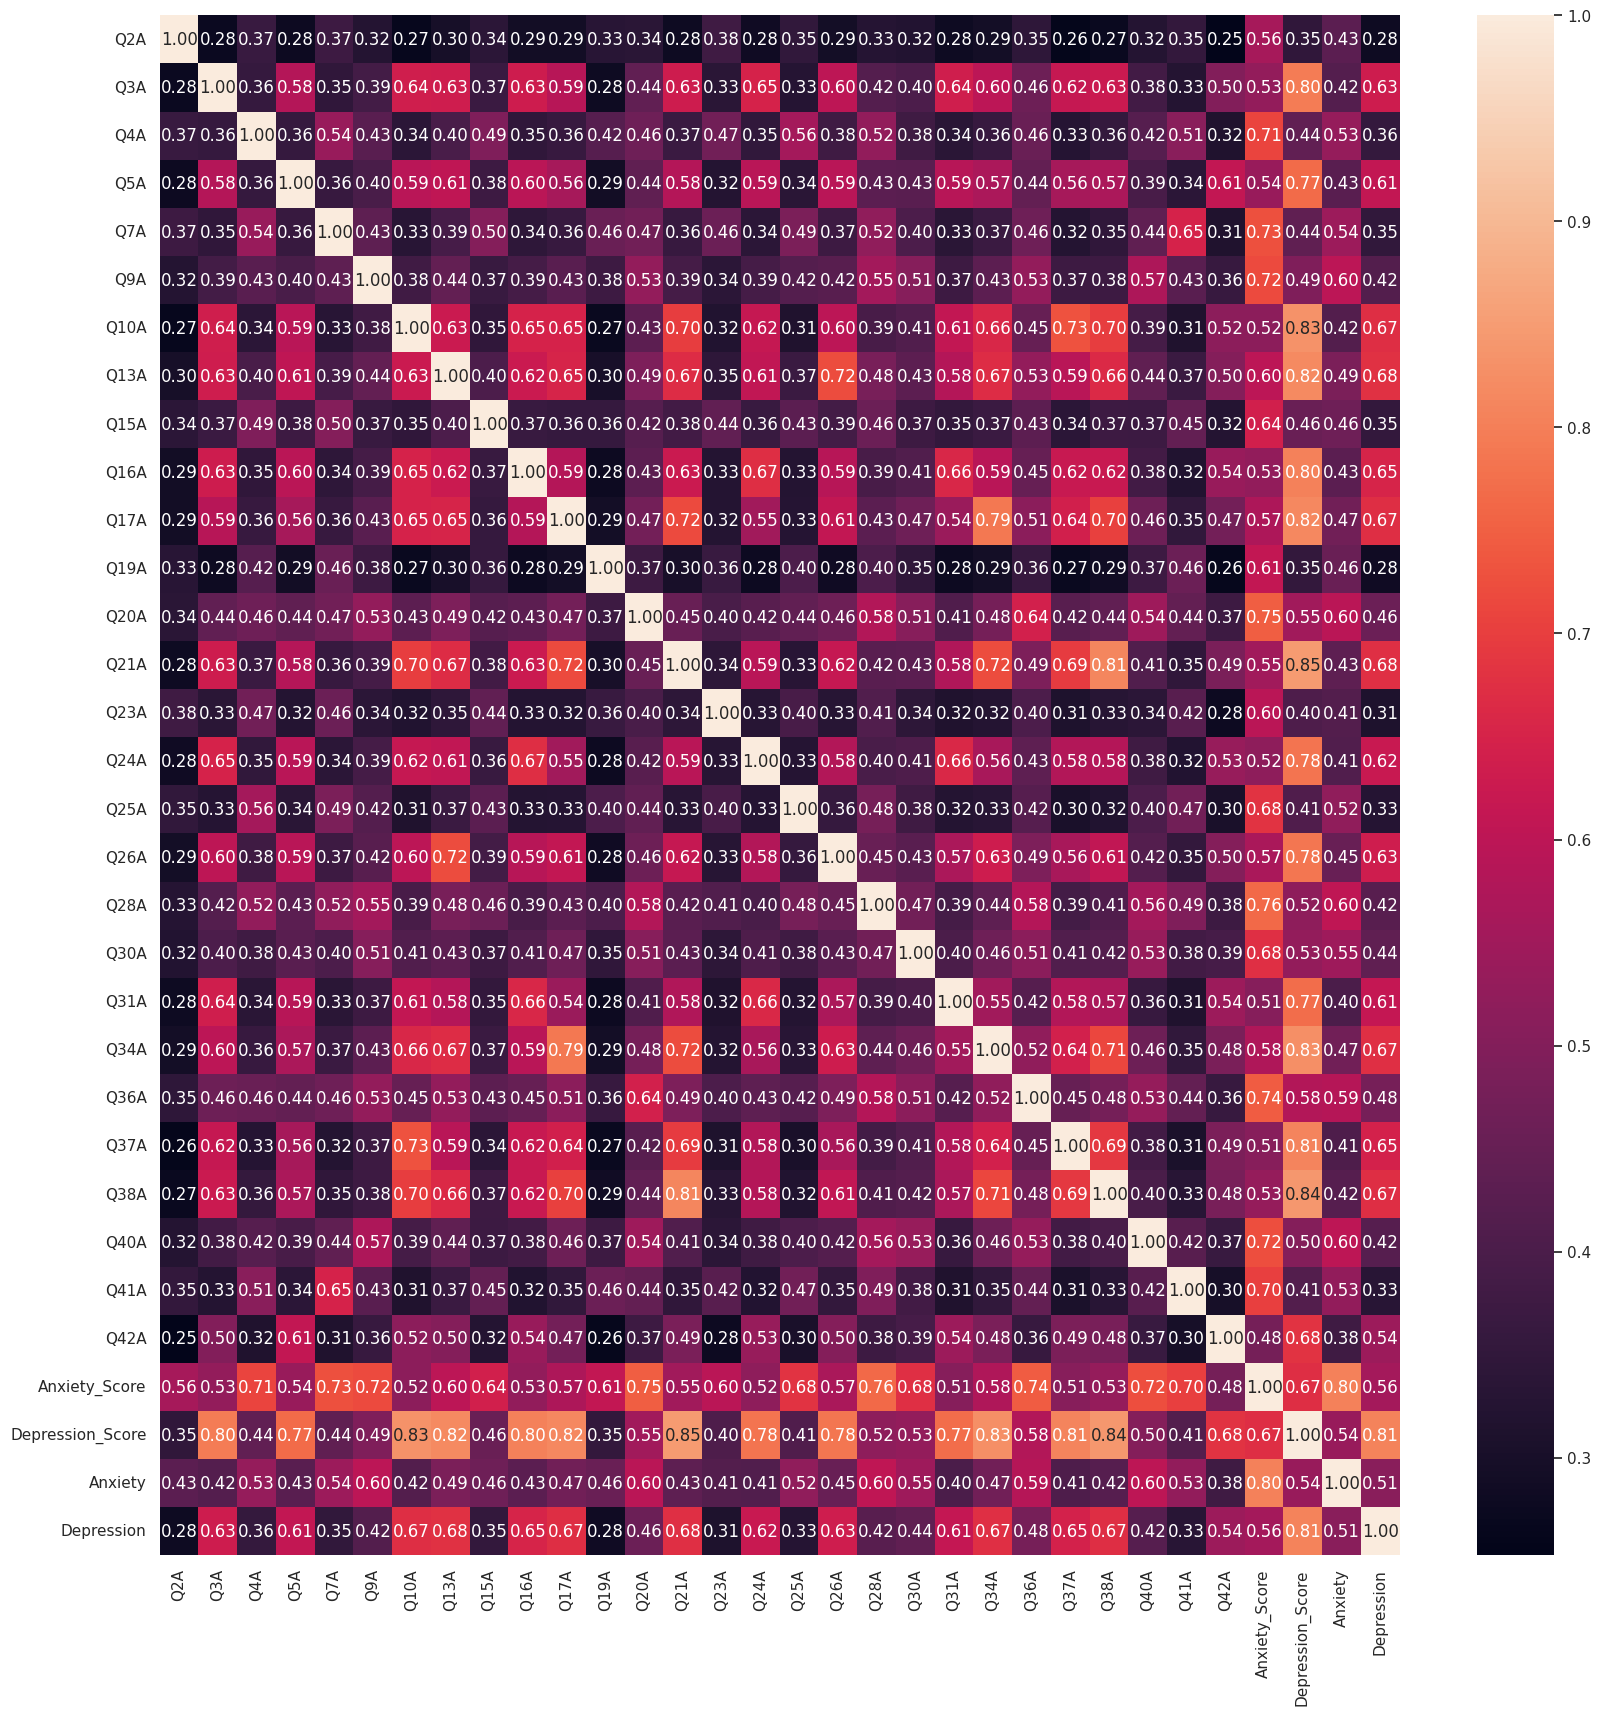

In [ ]:
dcorr=datared.corr(method='spearman')
plt.figure(figsize=(20,20))
sns.heatmap(dcorr,annot=True,fmt=".2f")
plt.show()

In [ ]:
trdata=datared.drop(columns=["Depression_Score","Anxiety_Score","Q2A"])
trdata.info()


<class 'pandas.core.frame.DataFrame'>
Index: 39768 entries, 0 to 39774
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Q3A         39768 non-null  int64
 1   Q4A         39768 non-null  int64
 2   Q5A         39768 non-null  int64
 3   Q7A         39768 non-null  int64
 4   Q9A         39768 non-null  int64
 5   Q10A        39768 non-null  int64
 6   Q13A        39768 non-null  int64
 7   Q15A        39768 non-null  int64
 8   Q16A        39768 non-null  int64
 9   Q17A        39768 non-null  int64
 10  Q19A        39768 non-null  int64
 11  Q20A        39768 non-null  int64
 12  Q21A        39768 non-null  int64
 13  Q23A        39768 non-null  int64
 14  Q24A        39768 non-null  int64
 15  Q25A        39768 non-null  int64
 16  Q26A        39768 non-null  int64
 17  Q28A        39768 non-null  int64
 18  Q30A        39768 non-null  int64
 19  Q31A        39768 non-null  int64
 20  Q34A        39768 non-null  int64

In [ ]:
classes={"anxiety","depression"}

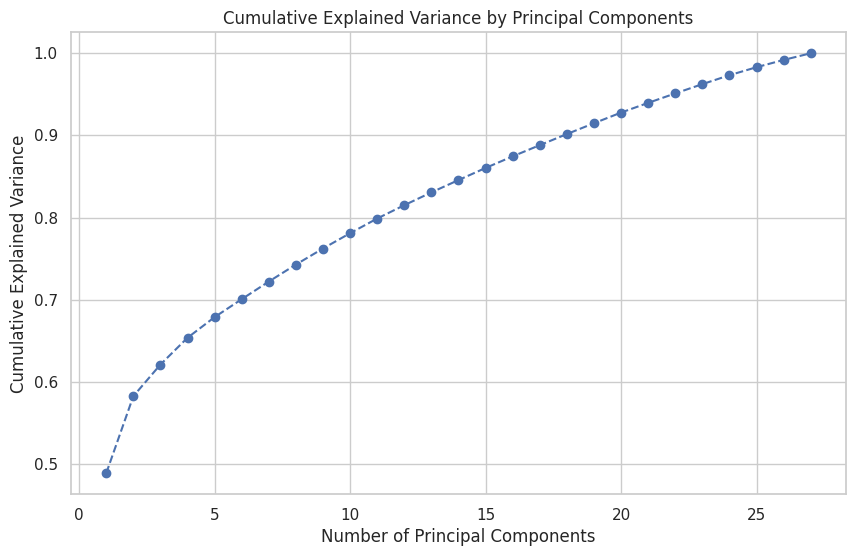

Principal Component 1: 0.4886 explained variance
Principal Component 2: 0.0938 explained variance
Principal Component 3: 0.0386 explained variance
Principal Component 4: 0.0326 explained variance
Principal Component 5: 0.0251 explained variance
Principal Component 6: 0.0218 explained variance
Principal Component 7: 0.0215 explained variance
Principal Component 8: 0.0207 explained variance
Principal Component 9: 0.0195 explained variance
Principal Component 10: 0.0186 explained variance
Principal Component 11: 0.0179 explained variance
Principal Component 12: 0.0162 explained variance
Principal Component 13: 0.0156 explained variance
Principal Component 14: 0.0150 explained variance
Principal Component 15: 0.0147 explained variance
Principal Component 16: 0.0141 explained variance
Principal Component 17: 0.0136 explained variance
Principal Component 18: 0.0135 explained variance
Principal Component 19: 0.0132 explained variance
Principal Component 20: 0.0130 explained variance
Principal

In [ ]:


pca = PCA()  # Keep all components to assess explained variance
X_pca = pca.fit_transform(trdata.iloc[:, :-2])

# Step 4: Plot explained variance to see how many components to retain
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

for i, variance in enumerate(explained_variance):
    print(f'Principal Component {i+1}: {variance:.4f} explained variance')



In [ ]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print(dim)

18


In [ ]:

from sklearn.metrics import accuracy_score, hamming_loss, multilabel_confusion_matrix, f1_score,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV



X = trdata.drop(columns=[ 'Depression', 'Anxiety']).values
y = trdata[['Anxiety', 'Depression']].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pca = PCA(n_components=0.90)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)







In [ ]:
y_train
y_test

array([[1, 1],
       [1, 1],
       [0, 0],
       ...,
       [1, 1],
       [0, 0],
       [1, 0]])

In [ ]:
from sklearn.multioutput import MultiOutputClassifier


In [ ]:
from xgboost import XGBClassifier

# Initialize the base classifier
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss',tree_method='hist')


multi_target_xgb = MultiOutputClassifier(xgb, n_jobs=-1)

# Train the model
multi_target_xgb.fit(x_train, y_train)

# Predict on the test set
y_pred = multi_target_xgb.predict(x_test)

# Evaluate the model for each label
print ("Training accuracy:",accuracy_score(y_train,multi_target_xgb.predict(x_train)))
print("Training Hamming loss:",hamming_loss(y_train,multi_target_xgb.predict(x_train)))
print("Training F1 Score:",f1_score(y_train,multi_target_xgb.predict(x_train),average="weighted"))

print("\nTesting Accuracy:", accuracy_score(y_test, y_pred))
print(" Testing Hamming Loss:", hamming_loss(y_test, y_pred))
print("Testing F1-Score:",f1_score(y_test,y_pred,average="weighted"))

Training accuracy: 0.9999281531774258
Training Hamming loss: 3.5923411287135827e-05
Training F1 Score: 0.9999737401889702

Testing Accuracy: 0.9647137708490487
 Testing Hamming Loss: 0.017726929846618052
Testing F1-Score: 0.9870288372952924


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint, uniform

# Define the XGBoost model wrapped in MultiOutputClassifier
xgb_model = MultiOutputClassifier(XGBClassifier(use_label_encoder=False, eval_metric='logloss'))

# Define parameter distribution
param_dist = {
    'estimator__n_estimators': randint(50, 350),             # Number of boosting rounds
    'estimator__max_depth': randint(3, 20),                  # Max depth of trees
    'estimator__learning_rate': uniform(0.01, 0.2),          # Learning rate
    'estimator__subsample': uniform(0.5, 0.5),               # Subsample ratio of the training instance
    'estimator__colsample_bytree': uniform(0.5, 0.5),        # Subsample ratio of columns when constructing each tree
    'estimator__min_child_weight': randint(1, 12),           # Minimum sum of instance weight needed in a child
    'estimator__gamma': uniform(0, 0.6),                     # Minimum loss reduction required to make a split
    'estimator__reg_alpha': uniform(0, 1),                   # L1 regularization term
    'estimator__reg_lambda': uniform(0, 1)                   # L2 regularization term
}

# Define the RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,                          # Number of parameter settings sampled
    scoring='f1_weighted',               # Scoring metric for multi-label
    cv=5,                                # Number of cross-validation folds
    verbose=1,
    random_state=42,
    n_jobs=-1                            # Use all processors
)

# Fit the model
random_search.fit(x_train, y_train)
y_pred=random_search.predict(x_test)
# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)

# Evaluate the model on the test set
y_pred = random_search.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Hamming Loss:", hamming_loss(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:58:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters found:  {'estimator__colsample_bytree': 0.9077307142274171, 'estimator__gamma': 0.4241144063085703, 'estimator__learning_rate': 0.15580143360819748, 'estimator__max_depth': 3, 'estimator__min_child_weight': 11, 'estimator__n_estimators': 310, 'estimator__reg_alpha': 0.926300878513349, 'estimator__reg_lambda': 0.6510770255019445, 'estimator__subsample': 0.9574798377718904}
Best score found:  0.9881903129270571
Accuracy: 0.97058577055225
Hamming Loss: 0.014707114723874969


In [ ]:
best_params=random_search.best_params_

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss',tree_method='hist',colsample_bytree=best_params["estimator__colsample_bytree"],gamma=best_params["estimator__gamma"],learning_rate= best_params["estimator__learning_rate"],n_estimators=best_params["estimator__n_estimators"],reg_alpha=best_params["estimator__reg_alpha"],reg_lambda=best_params["estimator__reg_lambda"],sub_sample=best_params["estimator__subsample"],min_child_weight=best_params["estimator__min_child_weight"],max_depth=best_params["estimator__max_depth"],random_state=42)


multi_target_xgb = MultiOutputClassifier(xgb, n_jobs=-1)


multi_target_xgb.fit(x_train, y_train)


y_pred = multi_target_xgb.predict(x_test)



print("Accuracy:", accuracy_score(y_test, y_pred))
print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))



Accuracy: 0.9705019693287522
Hamming Loss: 0.014749015335623901
F1 Score: 0.9892552405664413


In [ ]:



mlb = MultiLabelBinarizer()
mlb.fit([['depression'],['anxiety'],  [ 'anxiety','depression']])

# Converting the binary y_pred and y_test back to string label sets
y_pred_labels = mlb.inverse_transform(y_pred)
y_test_labels = mlb.inverse_transform(y_test)

print("Predicted Labels:", y_pred_labels)
print("True Labels:     ", y_test_labels)


Predicted Labels: [('anxiety', 'depression'), ('anxiety', 'depression'), (), ('anxiety', 'depression'), (), ('anxiety', 'depression'), ('anxiety', 'depression'), ('anxiety', 'depression'), ('anxiety', 'depression'), ('anxiety', 'depression'), ('anxiety',), ('anxiety', 'depression'), ('anxiety', 'depression'), ('anxiety', 'depression'), ('anxiety',), ('anxiety', 'depression'), ('depression',), ('anxiety', 'depression'), ('anxiety', 'depression'), ('anxiety', 'depression'), (), (), ('anxiety', 'depression'), (), ('depression',), (), ('anxiety', 'depression'), ('anxiety', 'depression'), ('anxiety',), (), ('depression',), ('anxiety', 'depression'), ('anxiety', 'depression'), ('anxiety', 'depression'), ('anxiety', 'depression'), (), ('anxiety',), (), ('anxiety', 'depression'), ('depression',), (), (), ('anxiety', 'depression'), (), ('anxiety', 'depression'), ('anxiety', 'depression'), ('anxiety',), ('anxiety',), ('depression',), ('anxiety', 'depression'), ('anxiety', 'depression'), (), ('an

In [ ]:
y_pred,y_test

(array([[1, 1],
        [1, 1],
        [0, 0],
        ...,
        [0, 0],
        [1, 0],
        [1, 0]]),
 array([[1, 1],
        [1, 1],
        [1, 0],
        ...,
        [0, 0],
        [1, 0],
        [1, 0]]))

In [ ]:
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix

# Assuming `y_test` and `y_pred` are your true and predicted multilabel outputs for Anxiety and Depression


# Generate a multilabel confusion matrix for each label
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Extract individual confusion matrices
conf_matrix_anxiety = confusion_matrices[0]  # For Anxiety label
conf_matrix_depression = confusion_matrices[1]  # For Depression label

print("Confusion Matrix for Anxiety:\n", conf_matrix_anxiety)
print("Confusion Matrix for Depression:\n", conf_matrix_depression)

both_anxiety_correct = np.sum((y_test[:, 0] == 1) & (y_pred[:, 0] == 1) & (y_test[:, 1] == 0) & (y_pred[:, 1] == 0))
both_depression_correct = np.sum((y_test[:, 1] == 1) & (y_pred[:, 1] == 1) & (y_test[:, 0] == 0) & (y_pred[:, 0] == 0))

print("Correctly identified Anxiety only cases ([1,0]):", both_anxiety_correct)
print("Correctly identified Depression only cases ([0,1]):", both_depression_correct)



Confusion Matrix for Anxiety:
 [[3575  169]
 [ 189 7998]]
Confusion Matrix for Depression:
 [[3777   18]
 [  22 8114]]
Correctly identified Anxiety only cases ([1,0]): 1172
Correctly identified Depression only cases ([0,1]): 1110


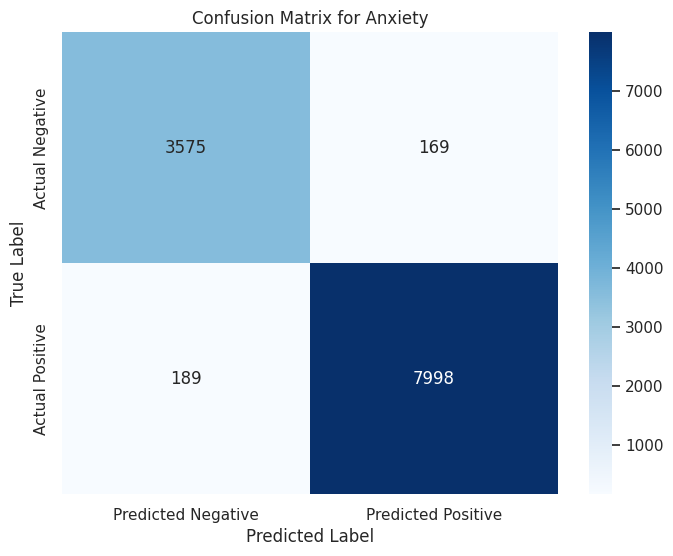

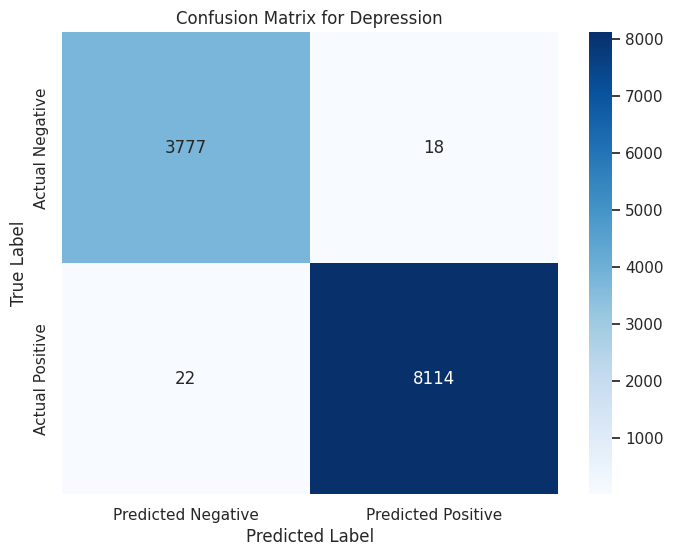

In [ ]:

# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


# Plot confusion matrices
plot_confusion_matrix(conf_matrix_anxiety, "Confusion Matrix for Anxiety")
plot_confusion_matrix(conf_matrix_depression, "Confusion Matrix for Depression")

In [ ]:
!pip install -q streamlit



In [ ]:

import joblib

joblib.dump(pca,'pca.pkl')
joblib.dump(multi_target_xgb, 'multi_target_xgb_model.pkl')




['multi_target_xgb_model.pkl']